<a href="https://colab.research.google.com/github/akhilerla/IT496/blob/main/AkhilE_A6_Radar_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import math
# create a dataframe for our alternative analysis matrix
AA =pd.DataFrame(columns=['criteria','weight','ratingA','ratingB','scoreA','scoreB'])
print(AA)

Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, scoreA, scoreB]
Index: []


In [6]:
#first step: add a list of criteria
AA['criteria']=['Improved Productivity','Risk to organization','Investment Required','Effort']
print(AA)

                criteria weight ratingA ratingB scoreA scoreB
0  Improved Productivity    NaN     NaN     NaN    NaN    NaN
1   Risk to organization    NaN     NaN     NaN    NaN    NaN
2    Investment Required    NaN     NaN     NaN    NaN    NaN
3                 Effort    NaN     NaN     NaN    NaN    NaN


In [7]:
AA['weight']=[0.3,0.3,0.2,0.2]
print(AA)

                criteria  weight ratingA ratingB scoreA scoreB
0  Improved Productivity     0.3     NaN     NaN    NaN    NaN
1   Risk to organization     0.3     NaN     NaN    NaN    NaN
2    Investment Required     0.2     NaN     NaN    NaN    NaN
3                 Effort     0.2     NaN     NaN    NaN    NaN


In [8]:
AA['ratingA']=[10,10,8,3]
AA['ratingB']=[10,2,8,10]
#step 4: calculate partial scores by multiplying weight * ratings
for index,row in AA.iterrows():
  AA['scoreA'][index]=row['ratingA']*row['weight']
  AA['scoreB'][index]=row['ratingB']*row['weight']

print(AA)

                criteria  weight  ratingA  ratingB scoreA scoreB
0  Improved Productivity     0.3       10       10    3.0    3.0
1   Risk to organization     0.3       10        2    3.0    0.6
2    Investment Required     0.2        8        8    1.6    1.6
3                 Effort     0.2        3       10    0.6    2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
totalScoreA=0
totalScoreB=0
for index, row in AA.iterrows():
  totalScoreA+=row['scoreA']
  totalScoreB+=row['scoreB']

print ('the total score for A 1s {:.2f} and for B is {:.2f}'.format (totalScoreA, totalScoreB))


the total score for A 1s 8.20 and for B is 7.20


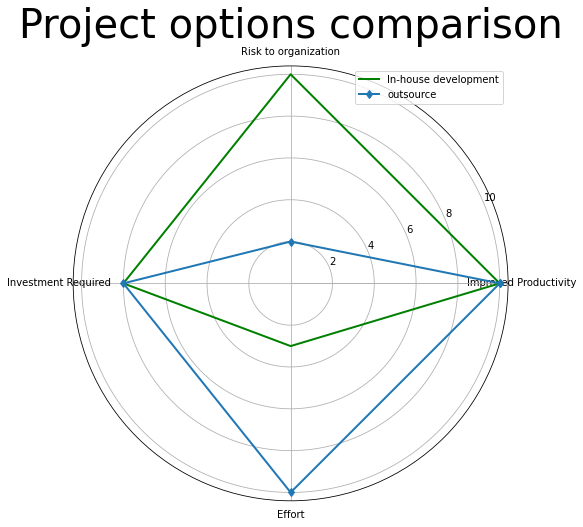

In [10]:
import numpy as np
import matplotlib.pyplot as plt
axisLocations = np.linspace(start=0, stop=2 * np.pi, num=len(AA['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA=AA['ratingA']
ratingsB=AA['ratingB']
ratingsACircular=np.concatenate((ratingsA,[ratingsA[0]]))
ratingsBCircular=np.concatenate((ratingsB,[ratingsB[0]]))
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(axisLocations,ratingsACircular,'g-', linewidth=2, label='In-house development')
plt.plot(axisLocations,ratingsBCircular,'d-', linewidth=2, label='outsource')
plt.title('Project options comparison', size=40)
lines, labels =plt.thetagrids(np.degrees(axisLocations), labels=AA['criteria'])
plt.legend()
plt.show()